In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = '/kaggle/input/skin-disease/Skin_disease_dataset/train'
val_dir = '/kaggle/input/skin-disease/Skin_disease_dataset/test'

In [5]:
#import os    
#list1 = os.listdir('/kaggle/input/skin-disease/Skin_disease_dataset/train')
#list1.sort()
#print(list1)
    #for filename in filenames:
     #   print(os.path.join(dirname, filename))

In [6]:
classes = ['Acne and Rosacea', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis', 'Basal Cell Carcinoma (BCC)', 'Benign Keratosis-like Lesions (BKL)', 'Bullous Disease', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema', 'Exanthems and Drug Eruptions', 'Hair Loss Alopecia and other Hair Diseases', 'Herpes HPV and other STDs', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanocytic Nevi (NV)', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy and other Contact Dermatitis', 'Psoriasis Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis', 'Warts Molluscum and other Viral Infections']

In [7]:
classes

['Acne and Rosacea',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis',
 'Basal Cell Carcinoma (BCC)',
 'Benign Keratosis-like Lesions (BKL)',
 'Bullous Disease',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema',
 'Exanthems and Drug Eruptions',
 'Hair Loss Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanocytic Nevi (NV)',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy and other Contact Dermatitis',
 'Psoriasis Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis',
 'Warts Molluscum and other Viral Infections']

In [8]:
batch_size = 100
IMG_SHAPE = 224

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 16800 images belonging to 26 classes.


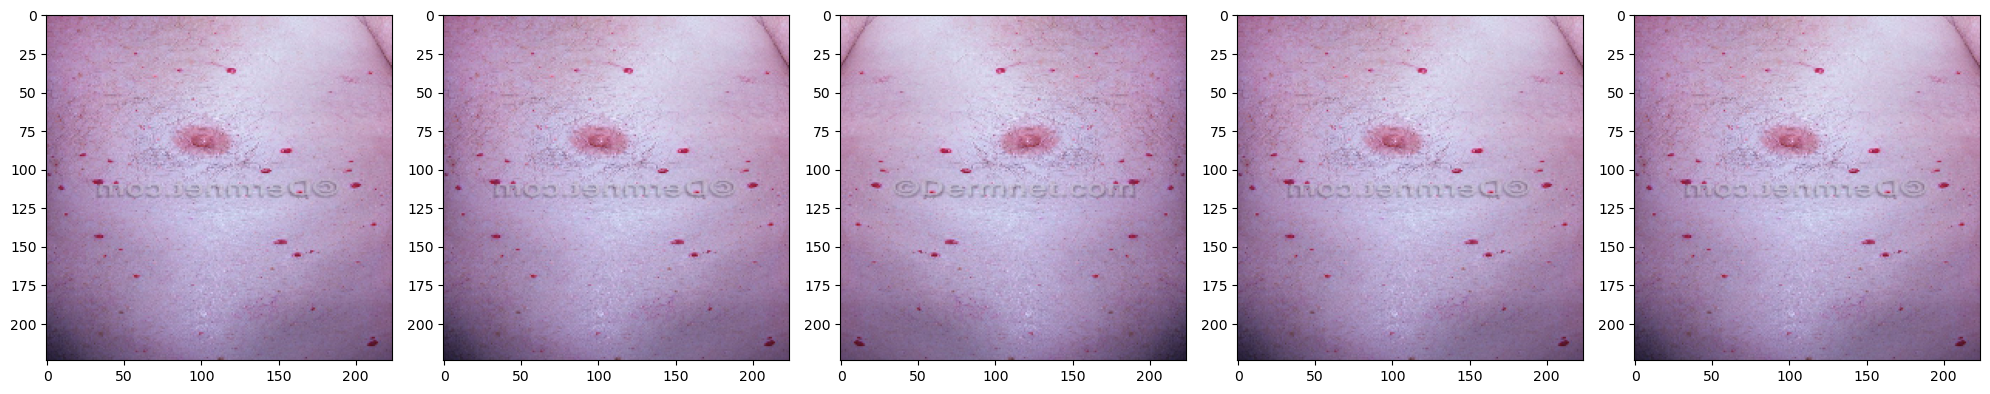

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 16800 images belonging to 26 classes.


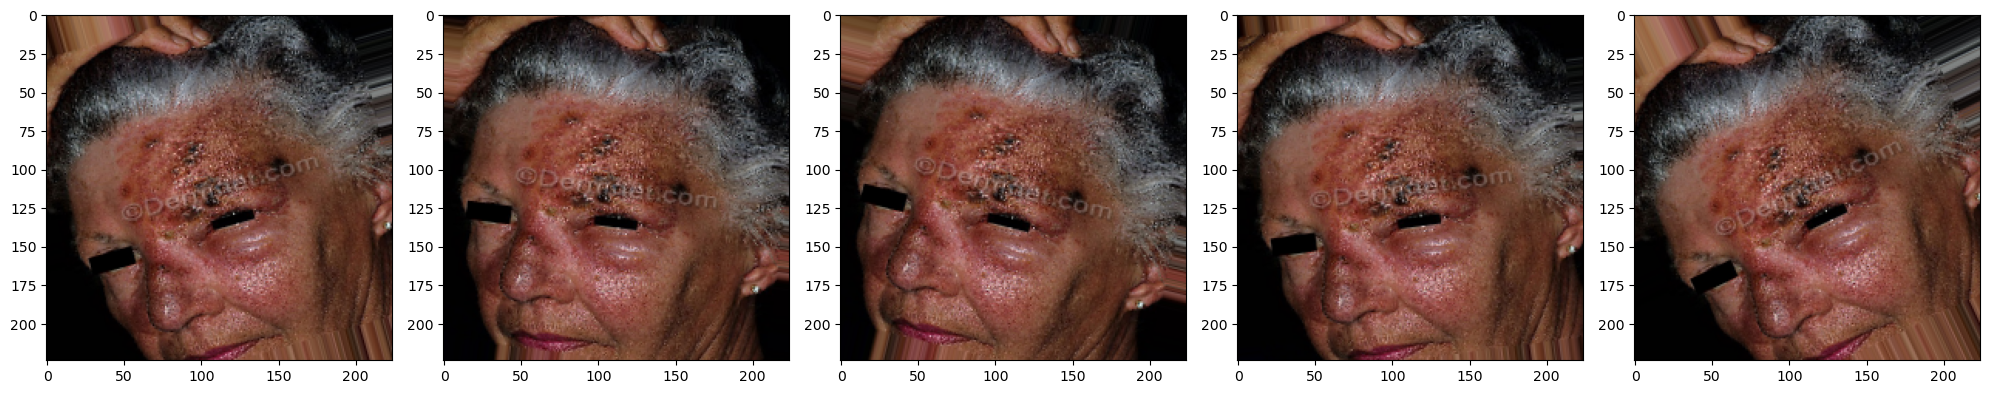

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 16800 images belonging to 26 classes.


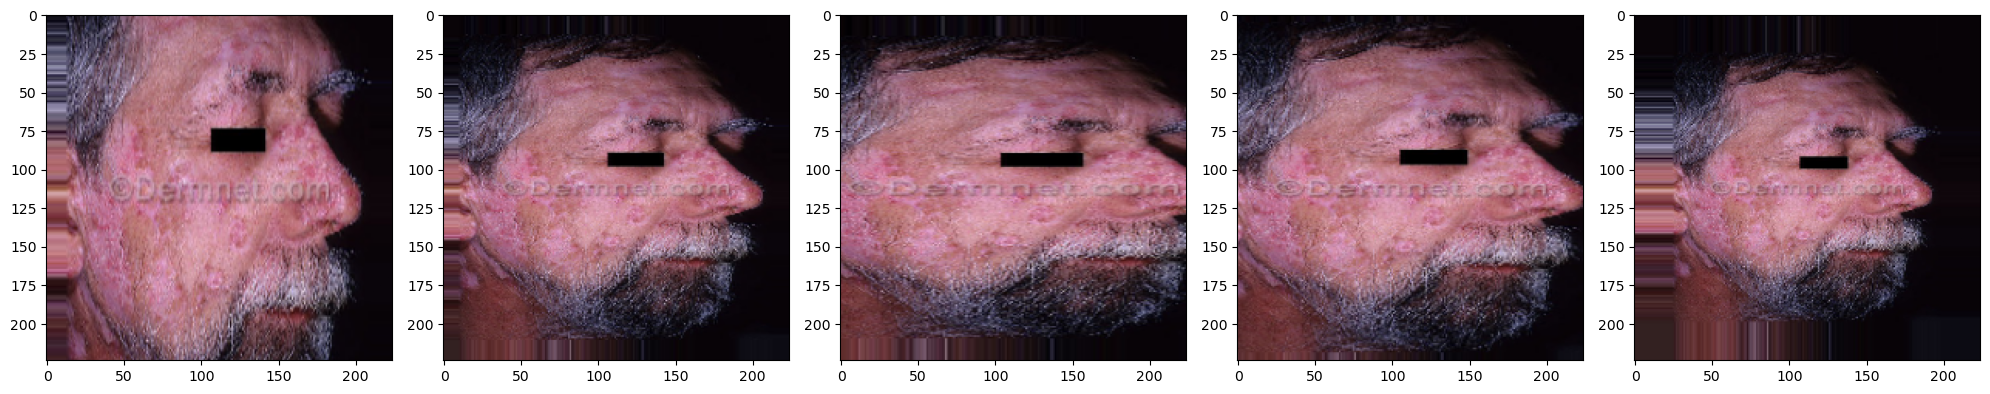

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 16800 images belonging to 26 classes.


In [16]:
import tensorflow_hub as hub

In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 4034 images belonging to 26 classes.


In [7]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/3"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE,3))

In [19]:
from tensorflow.keras import layers

In [20]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(26)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 26)                33306     
                                                                 
Total params: 2,291,290
Trainable params: 33,306
Non-trainable params: 2,257,984
_________________________________________________________________


model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(26))

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
epochs = 50

history = model.fit(
    train_data_gen,
    #steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    #validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/50
168/168 [==============================] - 451s 3s/step - loss: 2.5997 - accuracy: 0.2460 - val_loss: 2.5458 - val_accuracy: 0.2583
Epoch 2/50
168/168 [==============================] - 350s 2s/step - loss: 2.2837 - accuracy: 0.3190 - val_loss: 2.4149 - val_accuracy: 0.2885
Epoch 3/50
168/168 [==============================] - 349s 2s/step - loss: 2.1807 - accuracy: 0.3432 - val_loss: 2.3497 - val_accuracy: 0.3007
Epoch 4/50
168/168 [==============================] - 349s 2s/step - loss: 2.1313 - accuracy: 0.3579 - val_loss: 2.3566 - val_accuracy: 0.2992
Epoch 5/50
168/168 [==============================] - 348s 2s/step - loss: 2.0989 - accuracy: 0.3646 - val_loss: 2.3217 - val_accuracy: 0.3128
Epoch 6/50
168/168 [==============================] - 349s 2s/step - loss: 2.0702 - accuracy: 0.3714 - val_loss: 2.2984 - val_accuracy: 0.3176
Epoch 7/50
168/168 [==============================] - 352s 2s/step - loss: 2.0412 - accuracy: 0.3795 - val_loss: 2.2908 - val_accuracy: 0.3270

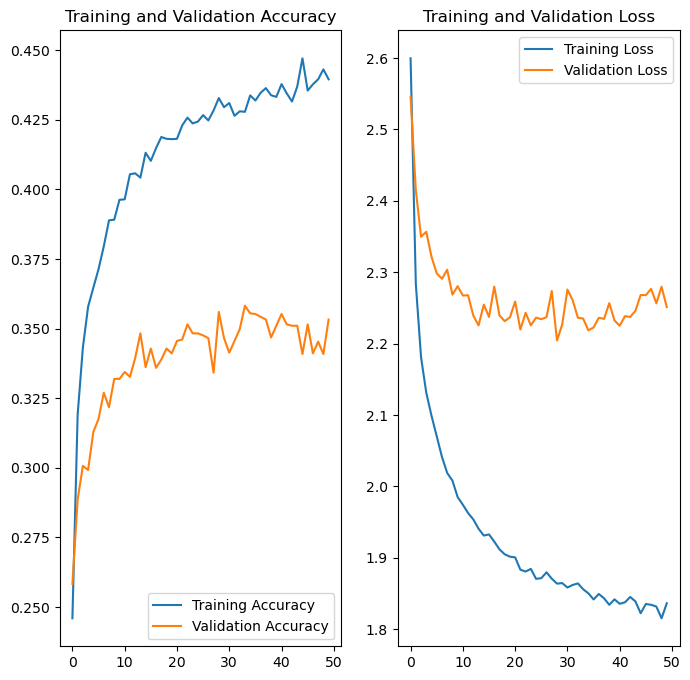

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the input image
img = Image.open('/kaggle/input/skin-disease/Skin_disease_dataset/train/Urticaria Hives/PUPPP-12.jpg')

# Preprocess the input image
img = img.resize((224, 224)) # resize to match the model's input shape
img = np.array(img) / 255.0 # normalize the pixel values between 0 and 1
img = np.expand_dims(img, axis=0) # add an extra dimension for the batch size

# Make predictions on the input image
predictions = model.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(predictions[0])

# Print the predicted class label
#class_labels = ['Acne', 'Eczema', 'Psoriasis', 'Rosacea', 'Skin cancer']
print('Predicted disease: ', classes[predicted_class])


1/1 [==============================] - 0s 25ms/step
Predicted disease:  Psoriasis Lichen Planus and related diseases
